In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('ggplot')


In [169]:
df_users = pd.read_csv('user_snapshots.csv')

df_users = df_users[df_users['marketId'] != '0x8472a9a7632b173c8cf3a86d3afec50c35548e76']

In [170]:
df_users['timestamp'] = pd.to_datetime(df_users['timestamp'], unit='s')

df_users.sort_values(by=['marketId', 'user', 'timestamp'], inplace=True)
most_recent_timestamps = df_users.groupby('marketId')['timestamp'].max()


def insert_closure_rows(group):
    market_id = group['marketId'].iloc[0]
    rows_to_add = [] 
    
    for i in range(len(group) - 1):
        if (group['timestamp'].iloc[i + 1] - group['timestamp'].iloc[i]) > pd.Timedelta(hours=48):
            new_row = group.iloc[i].copy()
            new_row['timestamp'] = group['timestamp'].iloc[i] + pd.Timedelta(hours=4)
            new_row['debt'] = 0
            new_row['collateral'] = 0
            new_row[['activeBand', 'collateralUsd', 'collateralUp', 'depositedCollateral', 'n', 'n1', 'n2', 'health', 'loss', 'lossPct', 'softLiq']] = None
            rows_to_add.append(new_row)

    if group['timestamp'].iloc[-1] < most_recent_timestamps[market_id]:
        new_row = group.iloc[-1].copy()
        new_row['timestamp'] = group['timestamp'].iloc[-1] + pd.Timedelta(hours=4)
        new_row['debt'] = 0
        new_row['collateral'] = 0
        new_row[['activeBand', 'collateralUsd', 'collateralUp', 'depositedCollateral', 'n', 'n1', 'n2', 'health', 'loss', 'lossPct', 'softLiq']] = None
        rows_to_add.append(new_row)
        
    if rows_to_add:
        group = pd.concat([group, pd.DataFrame(rows_to_add)], ignore_index=True)

    group.sort_values(by='timestamp', inplace=True)
    return group

df_users = df_users.groupby(['marketId', 'user']).apply(insert_closure_rows).reset_index(drop=True)


In [142]:
df_users[df_users['activeBand'].isna()]

,userStateSnapshotId,user,activeBand,collateral,stablecoin,oraclePrice,collateralUsd,collateralUp,depositedCollateral,debt,...,n1,n2,health,loss,lossPct,softLiq,timestamp,marketId,collateral.1,collateralName
601,0x37417b2238aa52d0dd2d6252d989e728e8f706e4-169...,0x002c2bd39ba80cf12c761edae0c949f8ba21e76b,None,0.0,0.000000,2126.806658,None,None,None,0.0,...,None,None,None,None,None,None,2023-11-27 16:00:47,0x100daa78fc509db39ef7d04de0c1abd299f4c6ce,0x7f39c581f595b53c5cb19bd0b3f8da6c935e2ca0,wstETH
784,0x37417b2238aa52d0dd2d6252d989e728e8f706e4-169...,0x0050f3427e5388e9cc458e977bc3444faf015618,None,0.0,0.275602,1789.135596,None,None,None,0.0,...,None,None,None,None,None,None,2023-11-27 16:00:47,0x100daa78fc509db39ef7d04de0c1abd299f4c6ce,0x7f39c581f595b53c5cb19bd0b3f8da6c935e2ca0,wstETH
944,0x37417b2238aa52d0dd2d6252d989e728e8f706e4-169...,0x00641ed1aae8a9700fd3fd4d899f2577d1ae6b22,None,0.0,0.000000,1816.766847,None,None,None,0.0,...,None,None,None,None,None,None,2023-11-27 16:00:47,0x100daa78fc509db39ef7d04de0c1abd299f4c6ce,0x7f39c581f595b53c5cb19bd0b3f8da6c935e2ca0,wstETH
1107,0x37417b2238aa52d0dd2d6252d989e728e8f706e4-169...,0x010d004994113122fe3d8c59398b8490f72016cf,None,0.0,0.000000,2116.878936,None,None,None,0.0,...,None,None,None,None,None,None,2023-11-27 16:00:47,0x100daa78fc509db39ef7d04de0c1abd299f4c6ce,0x7f39c581f595b53c5cb19bd0b3f8da6c935e2ca0,wstETH
1263,0x37417b2238aa52d0dd2d6252d989e728e8f706e4-169...,0x01a9e30c96c198de9c8910ca6b4751225a50dfde,None,0.0,0.000000,1804.101106,None,None,None,0.0,...,None,None,None,None,None,None,2023-11-27 16:00:47,0x100daa78fc509db39ef7d04de0c1abd299f4c6ce,0x7f39c581f595b53c5cb19bd0b3f8da6c935e2ca0,wstETH
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
469031,0xfa96ad0a9e64261db86950e2da362f5572c5c6fd-169...,0xf34b1bf36728dbee1ab4737134a6133680eaaa08,None,0.0,0.000000,1715.416600,None,None,None,0.0,...,None,None,None,None,None,None,2023-11-27 16:00:47,0xec0820efafc41d8943ee8de495fc9ba8495b15cf,0xac3e018457b222d93114458476f3e3416abbe38f,sfrxETH
469548,0xfa96ad0a9e64261db86950e2da362f5572c5c6fd-169...,0xf49b0201b65a00a2c30397e8a51753b5367050f0,None,0.0,3160.913149,1654.223532,None,None,None,0.0,...,None,None,None,None,None,None,2023-11-27 16:00:47,0xec0820efafc41d8943ee8de495fc9ba8495b15cf,0xac3e018457b222d93114458476f3e3416abbe38f,sfrxETH
469604,0xfa96ad0a9e64261db86950e2da362f5572c5c6fd-169...,0xf6528320a7a1332a1e4226d98964db5012b520ec,None,0.0,0.000000,1696.433146,None,None,None,0.0,...,None,None,None,None,None,None,2023-11-27 16:00:47,0xec0820efafc41d8943ee8de495fc9ba8495b15cf,0xac3e018457b222d93114458476f3e3416abbe38f,sfrxETH
469872,0xfa96ad0a9e64261db86950e2da362f5572c5c6fd-170...,0xf9a2fa22cb7df26e3a10622c696f37fc345c6239,None,0.0,556.955497,2216.459761,None,None,None,0.0,...,None,None,None,None,None,None,2023-11-27 16:00:47,0xec0820efafc41d8943ee8de495fc9ba8495b15cf,0xac3e018457b222d93114458476f3e3416abbe38f,sfrxETH


In [171]:
def absolute_change(series):
    return series.diff().fillna(series)

def percentage_change(series):
    pct_change = series.pct_change().fillna(1) * 100
    return pct_change.replace([pd.NA, float('inf'), -float('inf')], 100)

In [172]:
df_users['debt_change'] = df_users.groupby(['marketId', 'user'], group_keys=False)['debt'].apply(absolute_change)
df_users['debt_change_pct'] = df_users.groupby(['marketId', 'user'], group_keys=False)['debt'].apply(percentage_change)

In [173]:
df_users

,userStateSnapshotId,user,activeBand,collateral,stablecoin,oraclePrice,collateralUsd,collateralUp,depositedCollateral,debt,...,health,loss,lossPct,softLiq,timestamp,marketId,collateral.1,collateralName,debt_change,debt_change_pct
0,0x37417b2238aa52d0dd2d6252d989e728e8f706e4-169...,0x0027c200949943a923762f737763aec83f701c79,8,20.000000,0.0,1904.921927,38098.438547,20.0,20.0,32636.038216,...,0.043392,0.0,0.0,False,2023-08-18 04:04:47,0x100daa78fc509db39ef7d04de0c1abd299f4c6ce,0x7f39c581f595b53c5cb19bd0b3f8da6c935e2ca0,wstETH,32636.038216,100.000000
1,0x37417b2238aa52d0dd2d6252d989e728e8f706e4-169...,0x0027c200949943a923762f737763aec83f701c79,8,20.000000,0.0,1919.514539,38390.290774,20.0,20.0,32636.048902,...,0.043392,0.0,0.0,False,2023-08-18 08:04:47,0x100daa78fc509db39ef7d04de0c1abd299f4c6ce,0x7f39c581f595b53c5cb19bd0b3f8da6c935e2ca0,wstETH,0.010687,0.000033
2,0x37417b2238aa52d0dd2d6252d989e728e8f706e4-169...,0x0027c200949943a923762f737763aec83f701c79,8,20.000000,0.0,1915.005943,38300.118868,20.0,20.0,32636.059584,...,0.043392,0.0,0.0,False,2023-08-18 12:02:23,0x100daa78fc509db39ef7d04de0c1abd299f4c6ce,0x7f39c581f595b53c5cb19bd0b3f8da6c935e2ca0,wstETH,0.010682,0.000033
3,0x37417b2238aa52d0dd2d6252d989e728e8f706e4-169...,0x0027c200949943a923762f737763aec83f701c79,9,20.000000,0.0,1887.365709,37747.314171,20.0,20.0,32636.070855,...,0.043392,0.0,0.0,False,2023-08-18 16:02:59,0x100daa78fc509db39ef7d04de0c1abd299f4c6ce,0x7f39c581f595b53c5cb19bd0b3f8da6c935e2ca0,wstETH,0.011271,0.000035
4,0x37417b2238aa52d0dd2d6252d989e728e8f706e4-169...,0x0027c200949943a923762f737763aec83f701c79,9,20.000000,0.0,1885.399325,37707.986507,20.0,20.0,32636.082688,...,0.043392,0.0,0.0,False,2023-08-18 20:05:59,0x100daa78fc509db39ef7d04de0c1abd299f4c6ce,0x7f39c581f595b53c5cb19bd0b3f8da6c935e2ca0,wstETH,0.011833,0.000036
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
469977,0xfa96ad0a9e64261db86950e2da362f5572c5c6fd-169...,0xfb72ed826d1a8a1e82e4dfbcd6a4efc8d99142c7,-2,22.111279,0.0,1737.792892,38424.823403,22.111279,22.111279,15056.614392,...,0.033988,0.0,0.0,False,2023-10-04 08:29:35,0xec0820efafc41d8943ee8de495fc9ba8495b15cf,0xac3e018457b222d93114458476f3e3416abbe38f,sfrxETH,0.332859,0.002211
469978,0xfa96ad0a9e64261db86950e2da362f5572c5c6fd-169...,0xfb72ed826d1a8a1e82e4dfbcd6a4efc8d99142c7,-2,22.111279,0.0,1742.141324,38520.972796,22.111279,22.111279,15056.949254,...,0.033988,0.0,0.0,False,2023-10-04 12:23:35,0xec0820efafc41d8943ee8de495fc9ba8495b15cf,0xac3e018457b222d93114458476f3e3416abbe38f,sfrxETH,0.334862,0.002224
469979,0xfa96ad0a9e64261db86950e2da362f5572c5c6fd-169...,0xfb72ed826d1a8a1e82e4dfbcd6a4efc8d99142c7,0,22.111279,0.0,1728.304160,38215.01541,22.111279,22.111279,15057.308730,...,0.033988,0.0,0.0,False,2023-10-04 16:34:47,0xec0820efafc41d8943ee8de495fc9ba8495b15cf,0xac3e018457b222d93114458476f3e3416abbe38f,sfrxETH,0.359476,0.002387
469980,0xfa96ad0a9e64261db86950e2da362f5572c5c6fd-169...,0xfb72ed826d1a8a1e82e4dfbcd6a4efc8d99142c7,0,22.111279,0.0,1738.850066,38448.198878,22.111279,22.111279,15057.628137,...,0.033988,0.0,0.0,False,2023-10-04 20:17:59,0xec0820efafc41d8943ee8de495fc9ba8495b15cf,0xac3e018457b222d93114458476f3e3416abbe38f,sfrxETH,0.319407,0.002121


In [174]:
df_actions = df_users[abs(df_users['debt_change_pct']) > 0.1].copy()
df_actions

,userStateSnapshotId,user,activeBand,collateral,stablecoin,oraclePrice,collateralUsd,collateralUp,depositedCollateral,debt,...,health,loss,lossPct,softLiq,timestamp,marketId,collateral.1,collateralName,debt_change,debt_change_pct
0,0x37417b2238aa52d0dd2d6252d989e728e8f706e4-169...,0x0027c200949943a923762f737763aec83f701c79,8,20.000000,0.000000,1904.921927,38098.438547,20.0,20.0,32636.038216,...,0.043392,0.0,0.0,False,2023-08-18 04:04:47,0x100daa78fc509db39ef7d04de0c1abd299f4c6ce,0x7f39c581f595b53c5cb19bd0b3f8da6c935e2ca0,wstETH,32636.038216,100.000000
47,0x37417b2238aa52d0dd2d6252d989e728e8f706e4-169...,0x0027c200949943a923762f737763aec83f701c79,11,19.887191,0.000000,1876.570376,37319.714108,19.887191,20.0,32466.332249,...,0.043387,0.112809,0.564043,False,2023-08-28 12:32:23,0x100daa78fc509db39ef7d04de0c1abd299f4c6ce,0x7f39c581f595b53c5cb19bd0b3f8da6c935e2ca0,wstETH,-183.587763,-0.562292
79,0x37417b2238aa52d0dd2d6252d989e728e8f706e4-169...,0x0027c200949943a923762f737763aec83f701c79,11,19.782302,0.000000,1857.979001,36755.101651,19.782302,20.0,29294.571503,...,0.15124,0.217698,1.08849,False,2023-09-05 12:26:47,0x100daa78fc509db39ef7d04de0c1abd299f4c6ce,0x7f39c581f595b53c5cb19bd0b3f8da6c935e2ca0,wstETH,-3200.666308,-9.849647
269,0x37417b2238aa52d0dd2d6252d989e728e8f706e4-169...,0x0027c200949943a923762f737763aec83f701c79,2,10.752858,14508.113069,2039.915753,21934.92428,17.76188,20.0,32916.638523,...,0.035229,2.23812,11.190601,True,2023-10-24 16:00:35,0x100daa78fc509db39ef7d04de0c1abd299f4c6ce,0x7f39c581f595b53c5cb19bd0b3f8da6c935e2ca0,wstETH,3401.067682,11.522961
271,0x37417b2238aa52d0dd2d6252d989e728e8f706e4-169...,0x0027c200949943a923762f737763aec83f701c79,2,10.940115,13962.902925,2045.305699,22375.879458,17.691932,20.0,29519.945761,...,0.14993,2.308068,11.540342,True,2023-10-25 04:00:35,0x100daa78fc509db39ef7d04de0c1abd299f4c6ce,0x7f39c581f595b53c5cb19bd0b3f8da6c935e2ca0,wstETH,-3398.019724,-10.322691
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
469720,0xfa96ad0a9e64261db86950e2da362f5572c5c6fd-169...,0xf9a2fa22cb7df26e3a10622c696f37fc345c6239,-8,42.477461,0.000000,1886.223306,80121.977459,42.477461,44.796399,56952.849599,...,0.033578,2.318938,5.176617,False,2023-10-24 20:32:59,0xec0820efafc41d8943ee8de495fc9ba8495b15cf,0xac3e018457b222d93114458476f3e3416abbe38f,sfrxETH,-41013.592392,-41.864940
469802,0xfa96ad0a9e64261db86950e2da362f5572c5c6fd-169...,0xf9a2fa22cb7df26e3a10622c696f37fc345c6239,-24,61.761531,0.000000,2216.151186,136872.891239,61.761531,64.08047,97557.682481,...,0.033577,2.318938,3.618791,False,2023-11-10 16:00:35,0xec0820efafc41d8943ee8de495fc9ba8495b15cf,0xac3e018457b222d93114458476f3e3416abbe38f,sfrxETH,40429.404191,70.769513
469872,0xfa96ad0a9e64261db86950e2da362f5572c5c6fd-170...,0xf9a2fa22cb7df26e3a10622c696f37fc345c6239,None,0.000000,556.955497,2216.459761,None,None,None,0.000000,...,None,None,None,None,2023-11-25 08:04:11,0xec0820efafc41d8943ee8de495fc9ba8495b15cf,0xac3e018457b222d93114458476f3e3416abbe38f,sfrxETH,-97917.293376,-100.000000
469873,0xfa96ad0a9e64261db86950e2da362f5572c5c6fd-169...,0xfb72ed826d1a8a1e82e4dfbcd6a4efc8d99142c7,0,22.111279,0.000000,1723.218843,38102.57253,22.111279,22.111279,15000.883590,...,0.033988,0.0,0.0,False,2023-09-04 12:00:11,0xec0820efafc41d8943ee8de495fc9ba8495b15cf,0xac3e018457b222d93114458476f3e3416abbe38f,sfrxETH,15000.883590,100.000000


In [175]:
user_action_counts = df_actions.groupby(['marketId', 'user']).size().reset_index(name='action_count')
market_action_distribution = user_action_counts.groupby(['marketId', 'action_count']).size().reset_index(name='user_count')
markets = market_action_distribution['marketId'].unique()

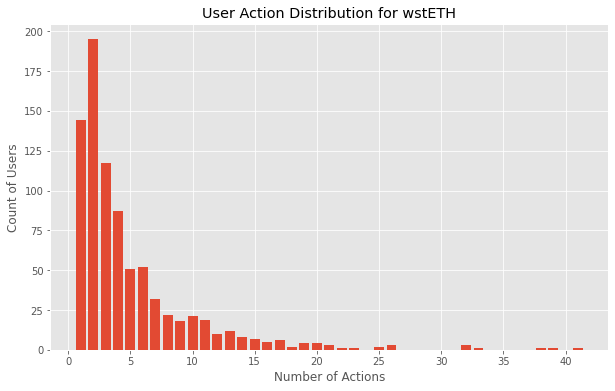

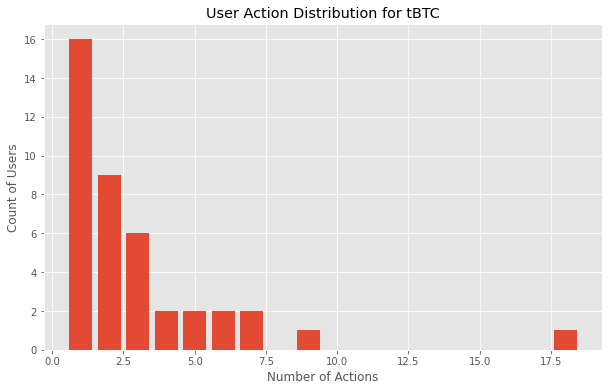

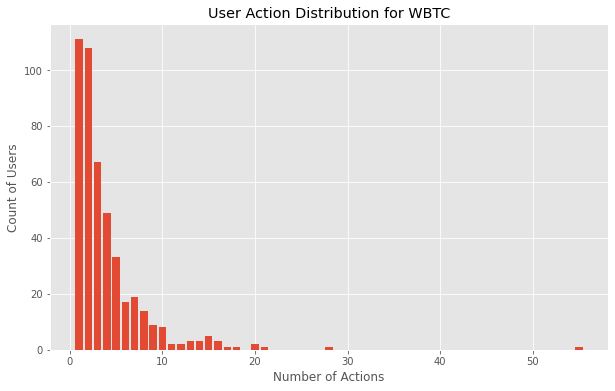

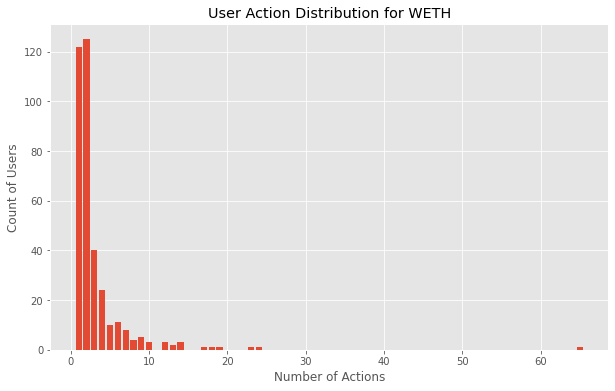

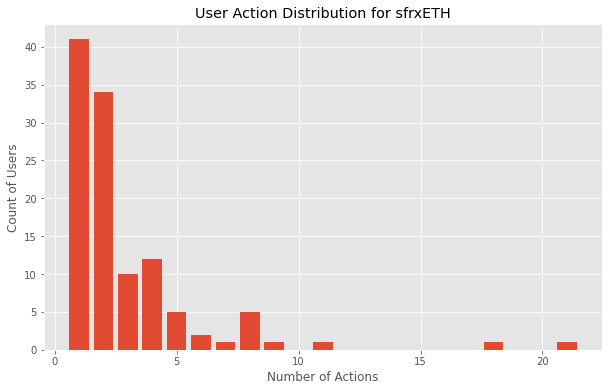

In [176]:
for market in markets:
    # Filter data for the market
    market_data = market_action_distribution[market_action_distribution['marketId'] == market]
    collat = list(df_users[df_users['marketId']==market]['collateralName'])[0]

    # Create plot
    plt.figure(figsize=(10, 6))
    plt.bar(market_data['action_count'], market_data['user_count'])

    # Set plot title and labels
    plt.title(f'User Action Distribution for {collat}')
    plt.xlabel('Number of Actions')
    plt.ylabel('Count of Users')
    
    # Show plot
    plt.show()

In [26]:
df_actions[df_actions['debt_change'] < 0]

,user,marketId,activeBand,collateral,stablecoin,oraclePrice,collateralUsd,depositedCollateral,debt,n,...,softLiq,timestamp,market_collateral_address,collateralName,rate,totalDebt,nLoans,snapshot_oraclePrice,debt_change,debt_change_pct
140646,0x0027c200949943a923762f737763aec83f701c79,0x100daa78fc509db39ef7d04de0c1abd299f4c6ce,11,19.887191,0.000000,1876.570376,37319.714108,20.000000,32466.332249,4,...,False,1693225943,0x7f39c581f595b53c5cb19bd0b3f8da6c935e2ca0,wstETH,0.025121,6.347821e+07,416,1876.570376,-183.587763,-0.562292
357221,0x0027c200949943a923762f737763aec83f701c79,0x100daa78fc509db39ef7d04de0c1abd299f4c6ce,11,19.782302,0.000000,1857.979001,36755.101651,20.000000,29294.571503,4,...,False,1693916807,0x7f39c581f595b53c5cb19bd0b3f8da6c935e2ca0,wstETH,0.047287,5.824104e+07,412,1857.979001,-3200.666308,-9.849647
515089,0x0027c200949943a923762f737763aec83f701c79,0x100daa78fc509db39ef7d04de0c1abd299f4c6ce,2,10.940115,13962.902925,2045.305699,22375.879458,20.000000,29519.945761,4,...,True,1698206435,0x7f39c581f595b53c5cb19bd0b3f8da6c935e2ca0,wstETH,0.080861,4.946211e+07,396,2045.305699,-3398.019724,-10.322691
39588,0x0027c200949943a923762f737763aec83f701c79,0x100daa78fc509db39ef7d04de0c1abd299f4c6ce,-11,14.577920,19804.912800,2342.603579,34150.287874,26.340000,43496.737050,4,...,True,1699678451,0x7f39c581f595b53c5cb19bd0b3f8da6c935e2ca0,wstETH,0.075396,6.692534e+07,412,2342.603579,-4897.478043,-10.119966
222496,0x002c2bd39ba80cf12c761edae0c949f8ba21e76b,0x100daa78fc509db39ef7d04de0c1abd299f4c6ce,-3,0.875523,197.273844,2140.164084,1873.762882,0.969680,1797.607915,4,...,True,1687666799,0x7f39c581f595b53c5cb19bd0b3f8da6c935e2ca0,wstETH,0.092606,2.917403e+07,239,2140.164084,-29.848148,-1.633317
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
529512,0xc0671f93291fc53b26d4127bd8fc5f37a3e6b7ab,0xec0820efafc41d8943ee8de495fc9ba8495b15cf,-8,5.220795,0.000000,1896.084329,9899.067678,5.220795,7586.180875,12,...,False,1698509387,0xac3e018457b222d93114458476f3e3416abbe38f,sfrxETH,0.082807,8.886699e+06,76,1896.084329,-516.326882,-6.372433
354692,0xf34b1bf36728dbee1ab4737134a6133680eaaa08,0xec0820efafc41d8943ee8de495fc9ba8495b15cf,0,519.267109,0.000000,1723.218843,894810.866549,519.267109,453284.474130,10,...,False,1693828811,0xac3e018457b222d93114458476f3e3416abbe38f,sfrxETH,0.045759,7.815759e+06,44,1723.218843,-249748.150661,-35.524404
363712,0xf34b1bf36728dbee1ab4737134a6133680eaaa08,0xec0820efafc41d8943ee8de495fc9ba8495b15cf,0,269.267109,0.000000,1720.342480,463231.646132,269.267109,252239.865332,10,...,False,1694103551,0xac3e018457b222d93114458476f3e3416abbe38f,sfrxETH,0.045630,7.555677e+06,47,1720.342480,-201210.604506,-44.373227
500082,0xf9a2fa22cb7df26e3a10622c696f37fc345c6239,0xec0820efafc41d8943ee8de495fc9ba8495b15cf,2,51.590447,23077.267532,1703.170011,87867.301924,66.965971,97903.657322,10,...,True,1697835551,0xac3e018457b222d93114458476f3e3416abbe38f,sfrxETH,0.054519,9.454757e+06,61,1703.170011,-3366.538532,-3.324313


In [129]:
df = df_actions.copy()


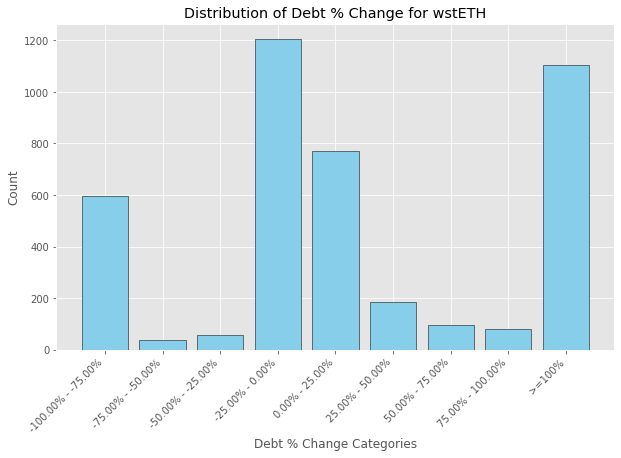

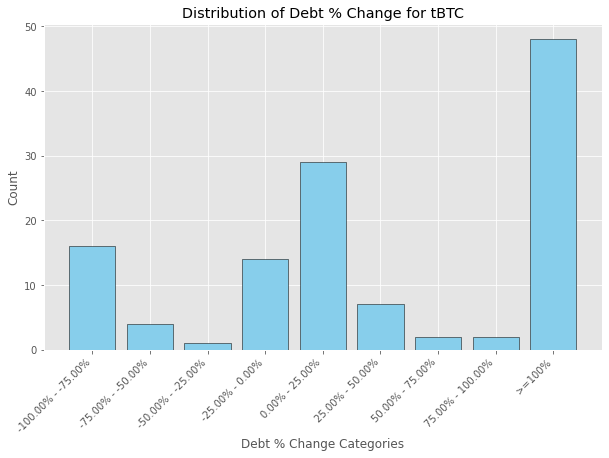

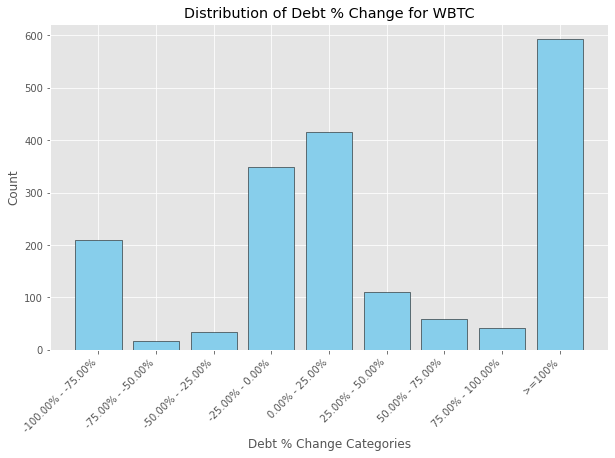

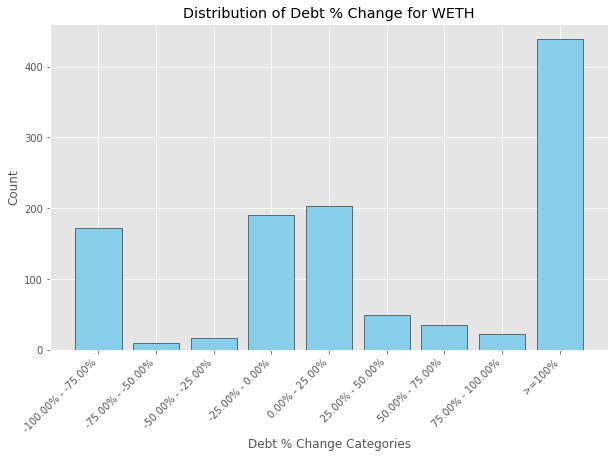

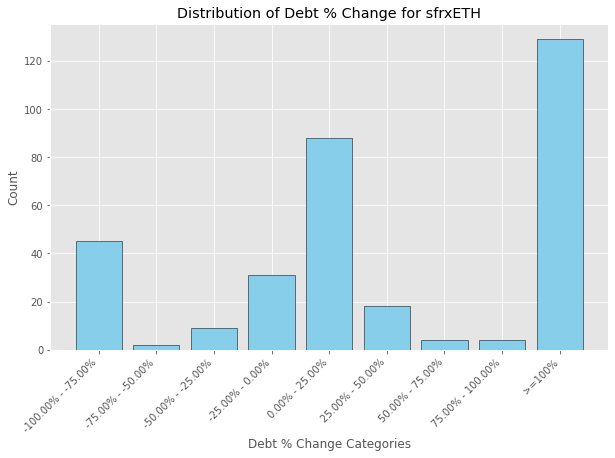

In [134]:
def define_bins(series):
    # Quantiles and IQR
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Non-outliers within the 100% limit
    non_outliers = series[(series >= lower_bound) & (series <= upper_bound) & (series <= 100)]

    # Bins: split non-outliers into 9 bins, add max value for >100% bin
    bins = np.linspace(non_outliers.min(), non_outliers.max(), 9).tolist()
    if series.max() > 100:
        bins.append(series.max())

    return bins

# Apply this function to the debt_change_pct column for each market
market_bins = {}
for market in df['collateralName'].unique():
    market_series = df[df['collateralName'] == market]['debt_change_pct']
    market_bins[market] = define_bins(market_series)

for market in df['collateralName'].unique():
    market_data = df[df['collateralName'] == market]['debt_change_pct']
    bins = market_bins[market]

    # Skip if there's insufficient data
    if len(bins) < 2:
        print(f"Skipping market {market} due to insufficient data")
        continue

    plt.figure(figsize=(10, 6))
    counts, bins = np.histogram(market_data, bins=bins)
    plt.bar(range(len(counts)), counts, edgecolor='black', color='skyblue')

    # Create bin labels
    bin_labels = [f"{bins[i]:.2f}% - {bins[i+1]:.2f}%" for i in range(len(bins)-1)]
    if bins[-1] > 100:
        bin_labels[-1] = ">=100%"

    plt.title(f'Distribution of Debt % Change for {market}')
    plt.xlabel('Debt % Change Categories')
    plt.ylabel('Count')
    plt.xticks(range(len(bin_labels)), labels=bin_labels, rotation=45, ha='right')

    plt.show()

In [177]:
df = df_users.copy()

In [178]:
df_markets = pd.read_csv('market_snapshots.csv')
df_markets = df_markets[df_markets['marketId'] != '0x8472a9a7632b173c8cf3a86d3afec50c35548e76']
df_markets
df_users = df.copy()
df_users.sort_values(by='timestamp', inplace=True)
df_markets.sort_values(by='timestamp', inplace=True)

In [179]:
def find_closest_rate(user_row, market_data):
    # Filter df_markets for the same marketId
    market_specific_data = market_data[market_data['marketId'] == user_row['marketId']]
    
    # Find the closest previous timestamp
    closest_row = market_specific_data[market_specific_data['timestamp'] <= user_row['timestamp']].iloc[-1]
    
    return closest_row['rate'] if not closest_row.empty else None

df_markets['timestamp'] = pd.to_datetime(df_markets['timestamp'], unit='s')
df_markets
df_users['rate'] = df_users.apply(lambda row: find_closest_rate(row, df_markets), axis=1)

In [180]:
df_users

,userStateSnapshotId,user,activeBand,collateral,stablecoin,oraclePrice,collateralUsd,collateralUp,depositedCollateral,debt,...,loss,lossPct,softLiq,timestamp,marketId,collateral.1,collateralName,debt_change,debt_change_pct,rate
229018,0x37417b2238aa52d0dd2d6252d989e728e8f706e4-168...,0xe057e6386047c690f6d2804ecd61e68441774bbc,-1,210.092115,0.0,2070.806419,435060.100509,210.092115,210.092115,280003.316963,...,0.0,0.0,False,2023-06-08 04:54:11,0x100daa78fc509db39ef7d04de0c1abd299f4c6ce,0x7f39c581f595b53c5cb19bd0b3f8da6c935e2ca0,wstETH,280003.316963,100.0,0.042760
82029,0x37417b2238aa52d0dd2d6252d989e728e8f706e4-168...,0x4f5ef03e870332a1b42453bbf57b8a041e89efe8,-1,10.200589,0.0,2070.806419,21123.444373,10.200589,0.0,11400.000000,...,0.0,0.0,False,2023-06-08 04:54:11,0x100daa78fc509db39ef7d04de0c1abd299f4c6ce,0x7f39c581f595b53c5cb19bd0b3f8da6c935e2ca0,wstETH,11400.000000,100.0,0.042760
101686,0x37417b2238aa52d0dd2d6252d989e728e8f706e4-168...,0x63b1efc5602c0023bbb373f2350cf34c2e5f8669,-1,0.177379,0.0,2070.806419,367.318075,0.177379,0.177379,250.002062,...,0.0,0.0,False,2023-06-08 04:54:11,0x100daa78fc509db39ef7d04de0c1abd299f4c6ce,0x7f39c581f595b53c5cb19bd0b3f8da6c935e2ca0,wstETH,250.002062,100.0,0.042760
121976,0x37417b2238aa52d0dd2d6252d989e728e8f706e4-168...,0x7a16ff8270133f063aab6c9977183d9e72835428,-1,305.268629,0.0,2070.806419,632152.236884,305.268629,305.268629,545901.980554,...,0.0,0.0,False,2023-06-08 04:54:11,0x100daa78fc509db39ef7d04de0c1abd299f4c6ce,0x7f39c581f595b53c5cb19bd0b3f8da6c935e2ca0,wstETH,545901.980554,100.0,0.042760
44798,0x37417b2238aa52d0dd2d6252d989e728e8f706e4-168...,0x2761a575cf6ea58d9d59426f1733df573d92cf36,-1,443.867235,0.0,2070.806419,919163.118863,443.867235,443.867235,761789.990125,...,0.0,0.0,False,2023-06-08 04:54:11,0x100daa78fc509db39ef7d04de0c1abd299f4c6ce,0x7f39c581f595b53c5cb19bd0b3f8da6c935e2ca0,wstETH,761789.990125,100.0,0.042760
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
326193,0xe0438eb3703bf871e31ce639bd351109c88666ea-170...,0x93208ff8d7abba4d871626a5a31643e08d52a18a,None,0.000000,0.0,37012.485905,None,None,None,0.000000,...,None,None,None,2023-11-27 16:09:11,0x4e59541306910ad6dc1dac0ac9dfb29bd9f15c67,0x2260fac5e5542a773aa44fbcfedf7c193bc2c599,WBTC,-169216.547458,-100.0,0.072640
381581,0x1681195c176239ac5e72d9aebacf5b2492e0c4ee-170...,0x0f75cb9bb4cda0e98227a8014bc8802d650dbf17,None,0.000000,0.0,2024.347796,None,None,None,0.000000,...,None,None,None,2023-11-27 16:09:11,0xa920de414ea4ab66b97da1bfe9e6eca7d4219635,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,WETH,-7096.314895,-100.0,0.071212
191130,0x37417b2238aa52d0dd2d6252d989e728e8f706e4-170...,0xb386b3370f3c258d241fed394050d60f7c421be7,None,0.000000,0.0,2322.947305,None,None,None,0.000000,...,None,None,None,2023-11-27 16:09:11,0x100daa78fc509db39ef7d04de0c1abd299f4c6ce,0x7f39c581f595b53c5cb19bd0b3f8da6c935e2ca0,wstETH,-20508.610958,-100.0,0.114161
261566,0xf9bd9da2427a50908c4c6d1599d8e62837c2bcb0-170...,0x0a02aa6db3d88e73433c789ddcf375c3434ccc6d,None,0.000000,0.0,36992.993568,None,None,None,0.000000,...,None,None,None,2023-11-27 16:09:11,0x1c91da0223c763d2e0173243eadaa0a2ea47e704,0x18084fba666a33d37592fa2633fd49a74dd93a88,tBTC,-462343.681096,-100.0,0.071067


In [182]:
df_actions = df_users[abs(df_users['debt_change_pct']) > 0.1].copy()
df_actions

,userStateSnapshotId,user,activeBand,collateral,stablecoin,oraclePrice,collateralUsd,collateralUp,depositedCollateral,debt,...,loss,lossPct,softLiq,timestamp,marketId,collateral.1,collateralName,debt_change,debt_change_pct,rate
229018,0x37417b2238aa52d0dd2d6252d989e728e8f706e4-168...,0xe057e6386047c690f6d2804ecd61e68441774bbc,-1,210.092115,0.0,2070.806419,435060.100509,210.092115,210.092115,280003.316963,...,0.0,0.0,False,2023-06-08 04:54:11,0x100daa78fc509db39ef7d04de0c1abd299f4c6ce,0x7f39c581f595b53c5cb19bd0b3f8da6c935e2ca0,wstETH,280003.316963,100.0,0.042760
82029,0x37417b2238aa52d0dd2d6252d989e728e8f706e4-168...,0x4f5ef03e870332a1b42453bbf57b8a041e89efe8,-1,10.200589,0.0,2070.806419,21123.444373,10.200589,0.0,11400.000000,...,0.0,0.0,False,2023-06-08 04:54:11,0x100daa78fc509db39ef7d04de0c1abd299f4c6ce,0x7f39c581f595b53c5cb19bd0b3f8da6c935e2ca0,wstETH,11400.000000,100.0,0.042760
101686,0x37417b2238aa52d0dd2d6252d989e728e8f706e4-168...,0x63b1efc5602c0023bbb373f2350cf34c2e5f8669,-1,0.177379,0.0,2070.806419,367.318075,0.177379,0.177379,250.002062,...,0.0,0.0,False,2023-06-08 04:54:11,0x100daa78fc509db39ef7d04de0c1abd299f4c6ce,0x7f39c581f595b53c5cb19bd0b3f8da6c935e2ca0,wstETH,250.002062,100.0,0.042760
121976,0x37417b2238aa52d0dd2d6252d989e728e8f706e4-168...,0x7a16ff8270133f063aab6c9977183d9e72835428,-1,305.268629,0.0,2070.806419,632152.236884,305.268629,305.268629,545901.980554,...,0.0,0.0,False,2023-06-08 04:54:11,0x100daa78fc509db39ef7d04de0c1abd299f4c6ce,0x7f39c581f595b53c5cb19bd0b3f8da6c935e2ca0,wstETH,545901.980554,100.0,0.042760
44798,0x37417b2238aa52d0dd2d6252d989e728e8f706e4-168...,0x2761a575cf6ea58d9d59426f1733df573d92cf36,-1,443.867235,0.0,2070.806419,919163.118863,443.867235,443.867235,761789.990125,...,0.0,0.0,False,2023-06-08 04:54:11,0x100daa78fc509db39ef7d04de0c1abd299f4c6ce,0x7f39c581f595b53c5cb19bd0b3f8da6c935e2ca0,wstETH,761789.990125,100.0,0.042760
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
326193,0xe0438eb3703bf871e31ce639bd351109c88666ea-170...,0x93208ff8d7abba4d871626a5a31643e08d52a18a,None,0.000000,0.0,37012.485905,None,None,None,0.000000,...,None,None,None,2023-11-27 16:09:11,0x4e59541306910ad6dc1dac0ac9dfb29bd9f15c67,0x2260fac5e5542a773aa44fbcfedf7c193bc2c599,WBTC,-169216.547458,-100.0,0.072640
381581,0x1681195c176239ac5e72d9aebacf5b2492e0c4ee-170...,0x0f75cb9bb4cda0e98227a8014bc8802d650dbf17,None,0.000000,0.0,2024.347796,None,None,None,0.000000,...,None,None,None,2023-11-27 16:09:11,0xa920de414ea4ab66b97da1bfe9e6eca7d4219635,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,WETH,-7096.314895,-100.0,0.071212
191130,0x37417b2238aa52d0dd2d6252d989e728e8f706e4-170...,0xb386b3370f3c258d241fed394050d60f7c421be7,None,0.000000,0.0,2322.947305,None,None,None,0.000000,...,None,None,None,2023-11-27 16:09:11,0x100daa78fc509db39ef7d04de0c1abd299f4c6ce,0x7f39c581f595b53c5cb19bd0b3f8da6c935e2ca0,wstETH,-20508.610958,-100.0,0.114161
261566,0xf9bd9da2427a50908c4c6d1599d8e62837c2bcb0-170...,0x0a02aa6db3d88e73433c789ddcf375c3434ccc6d,None,0.000000,0.0,36992.993568,None,None,None,0.000000,...,None,None,None,2023-11-27 16:09:11,0x1c91da0223c763d2e0173243eadaa0a2ea47e704,0x18084fba666a33d37592fa2633fd49a74dd93a88,tBTC,-462343.681096,-100.0,0.071067


In [183]:
df_users.to_csv('df_users.csv', index=None)
df_actions.to_csv('df_actions.csv', index=None)

In [181]:
market_specific_data = df_markets[df_markets['marketId'] == df_users.iloc[-1]['marketId']]
market_specific_data[market_specific_data['timestamp'] <= df_users.iloc[-1]['timestamp']]

,rate,totalCollateral,totalDebt,nLoans,timestamp,marketId,collateral,collateralName
2598,0.000000,0.000000,0.000000e+00,0,2023-08-26 20:30:35,0x1c91da0223c763d2e0173243eadaa0a2ea47e704,0x18084fba666a33d37592fa2633fd49a74dd93a88,tBTC
13229,0.013733,14.154242,2.610056e+05,1,2023-08-26 21:58:59,0x1c91da0223c763d2e0173243eadaa0a2ea47e704,0x18084fba666a33d37592fa2633fd49a74dd93a88,tBTC
14063,0.013733,14.154242,2.610057e+05,1,2023-08-26 22:06:47,0x1c91da0223c763d2e0173243eadaa0a2ea47e704,0x18084fba666a33d37592fa2633fd49a74dd93a88,tBTC
10507,0.013733,14.154242,2.610061e+05,1,2023-08-26 23:05:47,0x1c91da0223c763d2e0173243eadaa0a2ea47e704,0x18084fba666a33d37592fa2633fd49a74dd93a88,tBTC
14052,0.013733,14.154242,2.610065e+05,1,2023-08-27 00:05:35,0x1c91da0223c763d2e0173243eadaa0a2ea47e704,0x18084fba666a33d37592fa2633fd49a74dd93a88,tBTC
...,...,...,...,...,...,...,...,...
1188,0.072803,270.004892,6.195814e+06,32,2023-11-27 12:09:11,0x1c91da0223c763d2e0173243eadaa0a2ea47e704,0x18084fba666a33d37592fa2633fd49a74dd93a88,tBTC
1988,0.072803,270.004892,6.195862e+06,32,2023-11-27 13:06:23,0x1c91da0223c763d2e0173243eadaa0a2ea47e704,0x18084fba666a33d37592fa2633fd49a74dd93a88,tBTC
4755,0.071227,239.743222,5.421012e+06,31,2023-11-27 14:00:35,0x1c91da0223c763d2e0173243eadaa0a2ea47e704,0x18084fba666a33d37592fa2633fd49a74dd93a88,tBTC
5944,0.071078,233.064794,5.248446e+06,30,2023-11-27 15:01:23,0x1c91da0223c763d2e0173243eadaa0a2ea47e704,0x18084fba666a33d37592fa2633fd49a74dd93a88,tBTC
